In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles


Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with constraint visitexposuretime < 10 for columns ['fieldRA', 'fieldDec', 'filter']
Found 752818 visits
Running:  ['opsim_Count_filter_visitexposuretime_lt_10_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint visitexposuretime > 10 and note not like "DD%" for columns ['fieldRA', 'fieldDec', 'filter']
Found 1940509 visits
Running:  ['opsim_Count_filter_visitexposuretime_gt_10_and_note_not_like_DD_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "visitexposuretime < 10" constraint now.
monopole: 245.558  dipole: lon: -84.9632, lat: -87.0163, amp: 60.554
Plotting complete.
Plotting figures with "visitexposuretime > 10 and note not like "

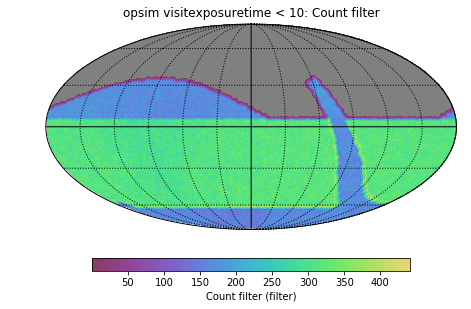

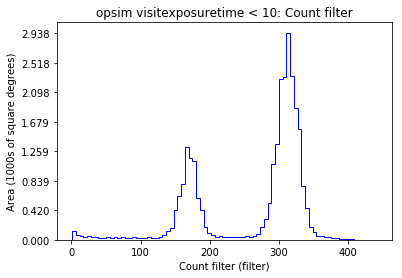

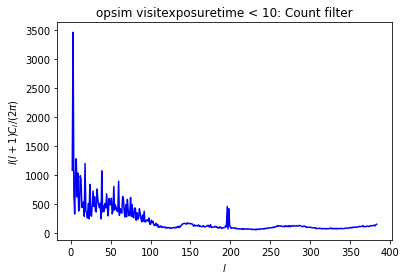

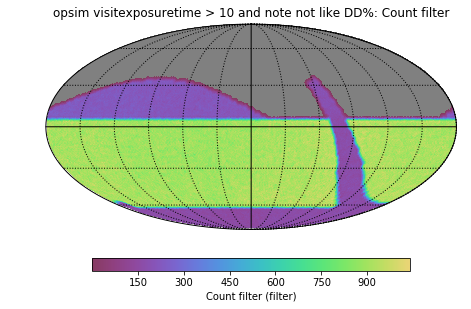

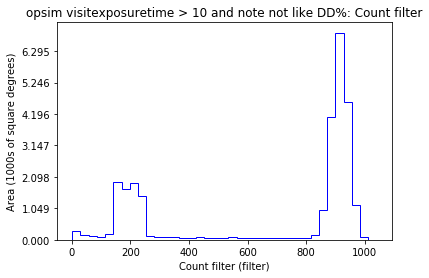

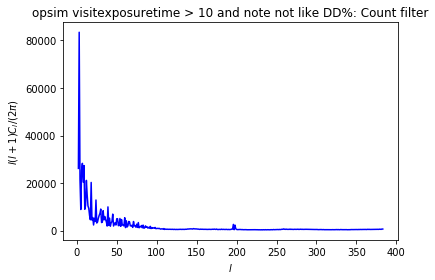

In [8]:
dbFile = 'sims_featureScheduler_runs1.5/short_exp/short_exp_5ns_5expt_v1.5_10yrs.db'
conn = db.OpsimDatabase(dbFile)
outDir='short_exp_plots'
resultsDb = db.ResultsDb(outDir=outDir)

sqls = ['visitexposuretime < 10', 'visitexposuretime > 10 and note not like "DD%"']
bundleList = []
for sql in sqls:


    metric = metrics.CountMetric( col='filter')
    slicer = slicers.HealpixSlicer()
    summaryStats = []
    plotDict = {'xlable': 'Number of visits'}
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict, summaryMetrics=summaryStats))
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)